# Projet Network Analysis for Information Retrieval
DURIAUD Matéo & TEKGOZ Sumeyye - M2 MIASHS

*A titre informatif nous nous sommes aidé de ChatGPT dans la fonction 2 afin de générer le graphe concernant les 100 contributions. Nous avons également utilisé cet outil dans un but de débogage afin de plus rapidement trouver nos erreurs pendant nos phases de programmation.*

# Fonction 1 : Acquisition des données

Le jeu de données est issue d’un cas d’étude qui peut différer d’une année sur l’autre et d’un profil d’étudiant à l’autre. Il est important de récupérer, nettoyer et sauvegarder les données dans un format facilement réutilisable. Les données comportent nécessairement à minima deux types de champs : une information textuelle (par ex. le titre d’un article) et une information structurelle (qui permet de relier les textes ou les auteurs des textes). Il faut aussi vérifier qu’il est possible de mettre en place une tâche de classification automatique supervisée. A ce stade, vous pouvez calculer quelques statistiques simples : nombre de documents et taille moyenne, nombre d’auteurs, distribution des documents par
auteur, distribution temporelle s’il y a lieu, nombre et distribution des classes.

On importe l'ensemble des librairies qui seront nécessaires pour le code.

In [ ]:
pip install sentence_transformers
pip install python-louvain

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import scipy.sparse as sparse
from community import community_louvain
from sklearn.cluster import SpectralClustering
import collections
import community
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec

In [2]:
#On télécharge le document déjà préparé qui est disponible en ligne via un repo GitHub. Cela permet un téléchargement simple et accessible à tous.
url = 'https://github.com/TekgozSumeyye/network_analysis/raw/main/data_network.xlsx'
#On obtiens alors un dataframe pandas que l'on affiche pour vérifier la bonne importation de nos données.
df = pd.read_excel(url, engine='openpyxl', index_col = 1)
df

,Unnamed: 0,dcterms:title{Literal},dcterms:abstract{Literal}@fr,cito:cites{URIRef}[0],cito:cites{URIRef}[1],cito:cites{URIRef}[2],cito:cites{URIRef}[3],cito:cites{URIRef}[4],cito:cites{URIRef}[5],cito:cites{URIRef}[6],...,marcrel:aut{URIRef}[0],marcrel:aut{URIRef}[1],marcrel:aut{URIRef}[2],marcrel:aut{URIRef}[3],marcrel:aut{URIRef}[4],marcrel:aut{URIRef}[5],marcrel:aut{URIRef}[6],marcrel:aut{URIRef}[7],marcrel:aut{URIRef}[8],marcrel:aut{URIRef}[9]
dcterms:identifier{Literal},,,,,,,,,,,,,,,,,,,,,
https://www.persee.fr/doc/palla_0031-0387_1992_num_38_1_1251,http://data.persee.fr/doc/palla_0031-0387_1992...,L'enfant chez Euripide : affectivitÃ© et drama...,"Depuis l'ouvrage de H. Devrient paru en 1904,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://data.persee.fr/authority/364475#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.persee.fr/doc/item_1167-5101_1999_num_13_1_1122,http://data.persee.fr/doc/item_1167-5101_1999_...,Watt de Samuel Beckett. Accompagnement graphiq...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://data.persee.fr/authority/583898#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.persee.fr/doc/bulmo_0007-473x_1912_num_76_1_12406_t1_0157_0000_5,http://data.persee.fr/doc/bulmo_0007-473x_1912...,Ã‰glises et autres Ã©difices rÃ©cemment classÃ©s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://data.persee.fr/authority/33031#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.persee.fr/doc/xxs_0294-1759_1999_num_63_1_3861,http://data.persee.fr/doc/xxs_0294-1759_1999_n...,Ã€ propos des archives militaires de la guerre...,Ã€ propos des archives militaires de la g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://data.persee.fr/authority/253861#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.persee.fr/doc/rbph_0035-0818_1927_num_6_1_6433,http://data.persee.fr/doc/rbph_0035-0818_1927_...,La femme aux cheveux coupÃ©s [Traduction de la...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://data.persee.fr/authority/246519#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.persee.fr/doc/cehm_0396-9045_1980_num_5_1_993,http://data.persee.fr/doc/cehm_0396-9045_1980_...,Verbe et personne en espagnol : de l'arbitrair...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://data.persee.fr/authority/856361#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.persee.fr/doc/reg_0035-2039_1966_num_79_376_3882,http://data.persee.fr/doc/reg_0035-2039_1966_n...,Rapport du trÃ©sorier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://data.persee.fr/authority/249330#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.persee.fr/doc/rbph_0035-0818_1993_num_71_1_5791_t1_0127_0000_4,http://data.persee.fr/doc/rbph_0035-0818_1993_...,"Leander Touati (A.-M.), Rystedt (E.) &amp; Wik...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://data.persee.fr/authority/247256#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Quelques statistiques descriptives

On commence par afficher quelques informations concernant le document afin de mieux comprendre sa structure et savoir comment nous pourrons le traiter par la suite.

In [3]:
number_unique_doc = df['dcterms:title{Literal}'].nunique()
print("Nombre de documents uniques :", number_unique_doc)

Nombre de documents uniques : 304320


In [4]:
document_size_mean = df['dcterms:title{Literal}'].str.len().mean()
print("Longueur moyenne des titres de documents :", document_size_mean)

Longueur moyenne des titres de documents : 73.94587335015444


In [5]:
#On extrait le "nom" des auteurs présents dans chacune des colonnes correspondantes et on compte le nombre de différents qui sont dans le document
colonne_auteur = df.filter(regex='^marcrel:aut{URIRef}\[\d+\]$').columns
auteurs = pd.Series(df[colonne_auteur].values.flatten())
nombre_auteur = auteurs.nunique()
print("Nombre d'auteurs différents :", nombre_auteur)

Nombre d'auteurs différents : 89467


In [6]:
#On regarde ensuite le nombre de contributions de chaque auteur
auteurs2 = pd.Series(df[colonne_auteur].values.flatten()).dropna()
distribution_auteur = auteurs2.value_counts()
print("Nombre de contributions par auteur :", distribution_auteur)

Nombre de contributions par auteur : http://data.persee.fr/authority/447419#Person    2287
http://data.persee.fr/authority/447426#Person    2287
http://data.persee.fr/authority/204226#Person    2013
http://data.persee.fr/authority/206377#Person    2013
http://data.persee.fr/authority/227444#Person    2012
                                                 ... 
http://data.persee.fr/authority/387218#Person       1
http://data.persee.fr/authority/686779#Person       1
http://data.persee.fr/authority/243399#Person       1
http://data.persee.fr/authority/243400#Person       1
http://data.persee.fr/authority/255787#Person       1
Length: 89467, dtype: int64


In [7]:
nombre_auteur = df['marcrel:aut{URIRef}[0]'].nunique()

In [8]:
nombre_auteur

74064

In [9]:
distribution_auteur = df['marcrel:aut{URIRef}[0]'].value_counts()

In [10]:
distribution_auteur

http://data.persee.fr/authority/204226#Person    2012
http://data.persee.fr/authority/161861#Person     958
http://data.persee.fr/authority/#Person           828
http://data.persee.fr/authority/394562#Person     714
http://data.persee.fr/authority/196565#Person     701
                                                 ... 
http://data.persee.fr/authority/692503#Person       1
http://data.persee.fr/authority/288772#Person       1
http://data.persee.fr/authority/207370#Person       1
http://data.persee.fr/authority/619002#Person       1
http://data.persee.fr/authority/255787#Person       1
Name: marcrel:aut{URIRef}[0], Length: 74064, dtype: int64

On affiche sous forme d'un histogramme la distribution du nombre de contributions pour tout nos auteurs. Nous pouvons voir que la très grande majorité ont un nombre de publications assez réduit mais il apparait tout de même que nous avons des individus avec plusieurs centaines d'articles avec même un maximum dépassant les 2000.

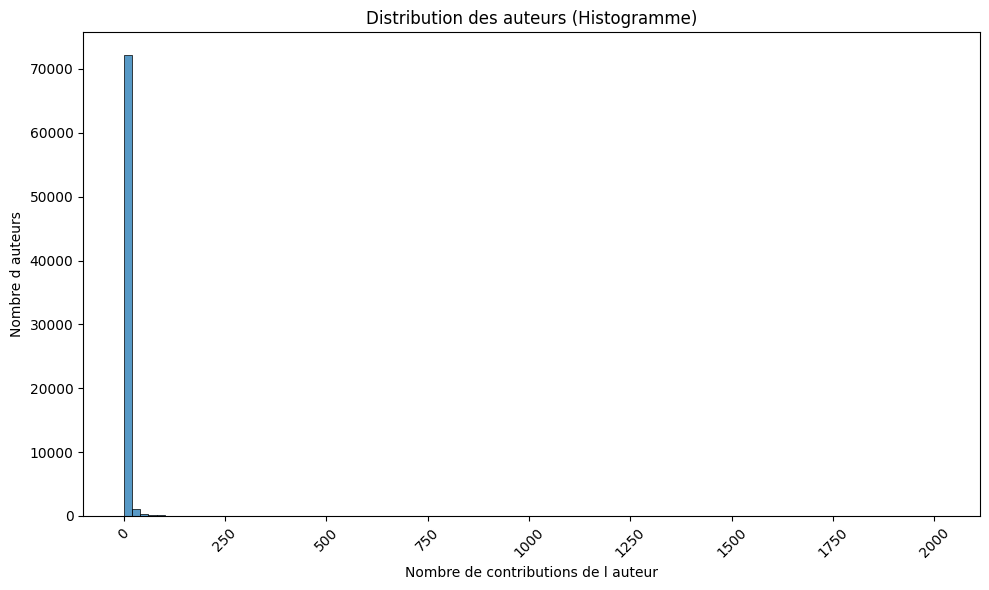

In [11]:
# Histogramme
plt.figure(figsize=(10, 6))
sns.histplot(distribution_auteur, bins=100, kde=False)
plt.title('Distribution des auteurs (Histogramme)')
plt.xlabel('Nombre de contributions de l auteur')
plt.ylabel('Nombre d auteurs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

On retrace le même graphique mais cette fois ci en considérant uniquement les 200 auteurs avec le plus de contributions. Nous remarquons que nous avons quelques rares individus avec plus de 500 publications mais à mesure que l'on se rapproche des 200 contributions le nombre d'auteurs augmente jusqu'à atteindre plusieurs dizaines. Cette croissance est cohérente mais il apparait malgré tout que le nombre de publications finit par être assez élevé.

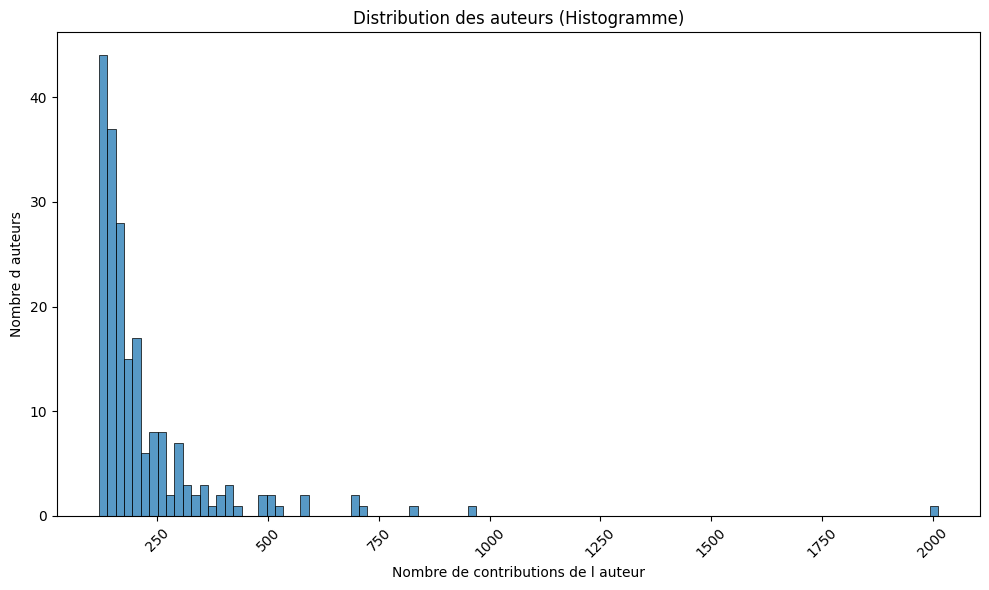

In [12]:
distribution_auteur = distribution_auteur.head(200)
# Histogramme
plt.figure(figsize=(10, 6))
sns.histplot(distribution_auteur, bins=100, kde=False)
plt.title('Distribution des auteurs (Histogramme)')
plt.xlabel('Nombre de contributions de l auteur')
plt.ylabel('Nombre d auteurs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

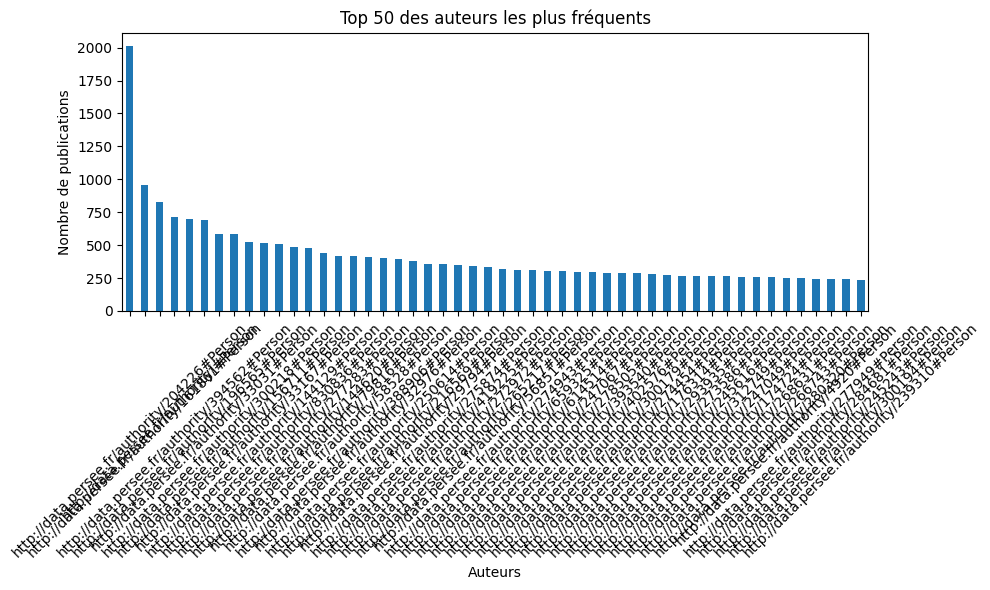

In [13]:
# On sélectionne les 50 auteurs les plus fréquents
top_authors = distribution_auteur.head(50)

# Tracer le bar plot
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Top 50 des auteurs les plus fréquents')
plt.xlabel('Auteurs')
plt.ylabel('Nombre de publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Extraction de la discipline

In [14]:
#On commence par télécharger la liste des disciplines qui sont censés exister et dont nous avons la correspondance
url = 'https://github.com/TekgozSumeyye/network_analysis/raw/main/20240141_disciplines.xlsx'
df_discipline = pd.read_excel(url, engine='openpyxl')
df_discipline

,collection_id,Discipline
0,1895,Histoire
1,abpo,Histoire
2,acsam,Archeologie (M.Anc.)
3,acsfo,Linguistique
4,acths,Pluri. Par essence
...,...,...
384,xvi,Litterature
385,xvii,Etudes g. a. cultur.
386,xxs,Histoire
387,htn,Geographie…


In [15]:
#On récupère uniquement l'index de chaque article afin de pouvoir en extraire la collection
ids = df.index.tolist()
ids

['https://www.persee.fr/doc/palla_0031-0387_1992_num_38_1_1251',
 'https://www.persee.fr/doc/item_1167-5101_1999_num_13_1_1122',
 'https://www.persee.fr/doc/bulmo_0007-473x_1912_num_76_1_12406_t1_0157_0000_5',
 'https://www.persee.fr/doc/xxs_0294-1759_1999_num_63_1_3861',
 'https://www.persee.fr/doc/rbph_0035-0818_1927_num_6_1_6433',
 'https://www.persee.fr/doc/pharm_0035-2349_2000_num_88_325_5057',
 'https://www.persee.fr/doc/rjuiv_0484-8616_1973_num_132_4_6087',
 'https://www.persee.fr/doc/bch_0007-4217_1900_num_24_1_3401',
 'https://www.persee.fr/doc/pop_0032-4663_1994_num_49_1_4591',
 'https://www.persee.fr/doc/hispa_0007-4640_1974_num_76_3_4378_t1_0554_0000_2',
 'https://www.persee.fr/doc/ahess_0395-2649_1975_num_30_2_293610_t1_0344_0000_001',
 'https://www.persee.fr/doc/geoca_0035-113x_1978_num_53_1_1212',
 'https://www.persee.fr/doc/etchi_0755-5857_2004_num_23_1_1413',
 'https://www.persee.fr/doc/ephe_0000-0001_1975_num_1_1_13707',
 'https://www.persee.fr/doc/bude_0004-5527_1980

In [16]:
liste_collections = []
#On construit une liste dans laquelle on stocke uniquement le nom de la collection pour chaque article
#On extrait donc uniquement la première partie de l'index qui correspond
for i in range(len(ids)) :
  liste_collections.append(ids[i].split("_")[0].split("/")[len(ids[i].split("_")[0].split("/"))-1])

In [17]:
print("Nombre de collections : ", len(np.unique(np.array(liste_collections))))
print("Nom des collections : ", np.unique(np.array(liste_collections)))

Nombre de collections :  318
Nom des collections :  ['1895' 'abpo' 'acsam' 'acsfo' 'acths' 'adh' 'afdi' 'aflin' 'agora'
 'ahess' 'ahrf' 'aijc' 'airdf' 'albin' 'ameri' 'amime' 'anami' 'anata'
 'anatm' 'anatv' 'annor' 'antaf' 'antiq' 'aommb' 'apliu' 'arasi' 'arch'
 'arcme' 'argil' 'arsci' 'arss' 'aru' 'arzan' 'asdi' 'asean' 'asie' 'assr'
 'autog' 'bagf' 'baip' 'barb' 'bavf' 'bcepl' 'bch' 'bcrh' 'bec' 'befeo'
 'bider' 'bmsap' 'bsef' 'bsnaf' 'bspf' 'bude' 'bulmi' 'bulmo' 'caf'
 'caief' 'calib' 'camar' 'camed' 'caoum' 'carav' 'casa' 'casla' 'ccgg'
 'cchav' 'cchyp' 'ccmaa' 'ccmed' 'cdval' 'cea' 'cehm' 'cejdg' 'cemot'
 'cep' 'chime' 'chris' 'civme' 'clao' 'clini' 'cllum' 'cmr' 'colan'
 'coloc' 'comin' 'comm' 'crai' 'criti' 'dam' 'debaj' 'dha' 'dhjap' 'dhs'
 'diasp' 'dirht' 'dreso' 'drlav' 'ds' 'dsedu' 'ebisu' 'ecelt' 'ecmed'
 'ecofi' 'ecop' 'ecoru' 'edyte' 'efr' 'emixx' 'emod' 'enfan' 'ephe'
 'epide' 'equiv' 'espat' 'espos' 'estat' 'etaf' 'etchi' 'etgla' 'ethio'
 'ethni' 'etnor' 'feldj' 'flan

In [18]:
# Vérifier si les valeurs existent dans la colonne spécifiée
resultat = df_discipline['collection_id'].isin(liste_collections)

# Afficher les lignes où les valeurs existent
nombre_de_true = sum(int(x) for x in resultat)

print("Nombre de collections dans le jeu de données :", len(np.unique(np.array(liste_collections))))
print("Nombre de valeurs trouvés dans la liste :", nombre_de_true)
print("Pourcentage des collections trouvées :", nombre_de_true/len(np.unique(np.array(liste_collections)))*100)

Nombre de collections dans le jeu de données : 318
Nombre de valeurs trouvés dans la liste : 305
Pourcentage des collections trouvées : 95.9119496855346


In [19]:
# On fusionne liste_collections avec df_discipline sur la colonne 'collection_id'
merged_df = pd.merge(pd.DataFrame({'collection_id': liste_collections}), df_discipline, on='collection_id', how='left')

# On remplace les valeurs NaN par 'Introuvable'
merged_df['Discipline'].fillna('Introuvable', inplace=True)

# On extrait les disciplines dans une liste
liste_disciplines = merged_df['Discipline'].tolist()

In [20]:
# On récupère les valeurs uniques et leurs occurrences
valeurs_uniques, occurrences = np.unique(np.array(liste_disciplines), return_counts=True)

# On affiche les noms des disciplines et le nombre d'occurrences pour chaque discipline
for discipline, occurrence in zip(valeurs_uniques, occurrences):
    print(f"Nom de la discipline : {discipline}, Nombre d'occurrences : {occurrence}")
#print("Nom des disciplines : ", np.unique(np.array(liste_disciplines)))
print("Nombre de collections introuvables :", liste_disciplines.count('Introuvable'))

Nom de la discipline : Anthropologie, Nombre d'occurrences : 3326
Nom de la discipline : Archeologie (M.Anc.), Nombre d'occurrences : 9144
Nom de la discipline : Arts (h. art archi.), Nombre d'occurrences : 1428
Nom de la discipline : Demographie, Nombre d'occurrences : 5037
Nom de la discipline : Droit, Nombre d'occurrences : 7475
Nom de la discipline : Economie, Nombre d'occurrences : 4782
Nom de la discipline : Etudes classiques, Nombre d'occurrences : 23469
Nom de la discipline : Etudes g. a. cultur., Nombre d'occurrences : 17767
Nom de la discipline : Etudes regionales, Nombre d'occurrences : 473
Nom de la discipline : Geographie…, Nombre d'occurrences : 7100
Nom de la discipline : Hist. sc. techniques, Nombre d'occurrences : 8066
Nom de la discipline : Histoire, Nombre d'occurrences : 56513
Nom de la discipline : Introuvable, Nombre d'occurrences : 729
Nom de la discipline : Linguistique, Nombre d'occurrences : 14926
Nom de la discipline : Litterature, Nombre d'occurrences : 2271

In [21]:
#On ajoute maintenant la nouvelle colonne discipline au dataframe et nous pourrons l'utiliser pour plus tard
df['Disciplines'] = liste_disciplines
df

,Unnamed: 0,dcterms:title{Literal},dcterms:abstract{Literal}@fr,cito:cites{URIRef}[0],cito:cites{URIRef}[1],cito:cites{URIRef}[2],cito:cites{URIRef}[3],cito:cites{URIRef}[4],cito:cites{URIRef}[5],cito:cites{URIRef}[6],...,marcrel:aut{URIRef}[1],marcrel:aut{URIRef}[2],marcrel:aut{URIRef}[3],marcrel:aut{URIRef}[4],marcrel:aut{URIRef}[5],marcrel:aut{URIRef}[6],marcrel:aut{URIRef}[7],marcrel:aut{URIRef}[8],marcrel:aut{URIRef}[9],Disciplines
dcterms:identifier{Literal},,,,,,,,,,,,,,,,,,,,,
https://www.persee.fr/doc/palla_0031-0387_1992_num_38_1_1251,http://data.persee.fr/doc/palla_0031-0387_1992...,L'enfant chez Euripide : affectivitÃ© et drama...,"Depuis l'ouvrage de H. Devrient paru en 1904,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Litterature
https://www.persee.fr/doc/item_1167-5101_1999_num_13_1_1122,http://data.persee.fr/doc/item_1167-5101_1999_...,Watt de Samuel Beckett. Accompagnement graphiq...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Litterature
https://www.persee.fr/doc/bulmo_0007-473x_1912_num_76_1_12406_t1_0157_0000_5,http://data.persee.fr/doc/bulmo_0007-473x_1912...,Ã‰glises et autres Ã©difices rÃ©cemment classÃ©s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Histoire
https://www.persee.fr/doc/xxs_0294-1759_1999_num_63_1_3861,http://data.persee.fr/doc/xxs_0294-1759_1999_n...,Ã€ propos des archives militaires de la guerre...,Ã€ propos des archives militaires de la g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Histoire
https://www.persee.fr/doc/rbph_0035-0818_1927_num_6_1_6433,http://data.persee.fr/doc/rbph_0035-0818_1927_...,La femme aux cheveux coupÃ©s [Traduction de la...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linguistique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.persee.fr/doc/cehm_0396-9045_1980_num_5_1_993,http://data.persee.fr/doc/cehm_0396-9045_1980_...,Verbe et personne en espagnol : de l'arbitrair...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linguistique
https://www.persee.fr/doc/reg_0035-2039_1966_num_79_376_3882,http://data.persee.fr/doc/reg_0035-2039_1966_n...,Rapport du trÃ©sorier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Etudes classiques
https://www.persee.fr/doc/rbph_0035-0818_1993_num_71_1_5791_t1_0127_0000_4,http://data.persee.fr/doc/rbph_0035-0818_1993_...,"Leander Touati (A.-M.), Rystedt (E.) &amp; Wik...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linguistique


#Fonction 2 : Prise en compte de la structure du corpus
Vous avez à votre disposition des informations qui vous permettent de structurer votre corpus. Construisez un graphe à partir de ces  formations en choisissant l’identité des nœuds (par ex. document ou auteur) et ce qui constitue le lien entre eux (par ex. lien de citation ou de co-autorat). Vous pouvez calculer de nouvelles statistiques basées sur la structure du graphe : distribution des degrés (ou des autres mesures de centralité), nombre de composantes connexes, largeur, densité, etc. Ces informations peuvent vous être utiles pour préparer le graphe aux traitements  ultérieurs, en particulier réduire sa taille afin que les analyses soient réalisées dans des temps raisonnables. Pour finir, utilisez une technique de visualisation des données pour vous faire une idée de la topologie de vos données. N’hésitez pas à projeter certaines caractéristiques des nœuds (par ex. la classe) sur cette visualisation.

In [ ]:
# on initialise un graphe G, qui affiche tous les auteurs du dataframe
"""
G = nx.Graph()

author_to_num = {}
current_num = 1

for _, row in df.iterrows():
    main_author = row['marcrel:aut{URIRef}[0]']
    if pd.notnull(main_author):
        if main_author not in author_to_num:
            author_to_num[main_author] = current_num
            current_num += 1
        main_author_num = author_to_num[main_author]

        for i in range(1, 10):
            co_author_col_name = f'marcrel:aut{{URIRef}}[{i}]'
            if co_author_col_name in row and pd.notnull(row[co_author_col_name]):
                co_author = row[co_author_col_name]
                if co_author not in author_to_num:
                    author_to_num[co_author] = current_num
                    current_num += 1
                co_author_num = author_to_num[co_author]
                G.add_edge(main_author_num, co_author_num)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, labels={num: num for num in G.nodes()}, font_size=8)

plt.axis('off')
plt.show()
"""

"\nG = nx.Graph()\n\nauthor_to_num = {}\ncurrent_num = 1\n\nfor _, row in df.iterrows():\n    main_author = row['marcrel:aut{URIRef}[0]']\n    if pd.notnull(main_author):\n        if main_author not in author_to_num:\n            author_to_num[main_author] = current_num\n            current_num += 1\n        main_author_num = author_to_num[main_author]\n\n        for i in range(1, 10):\n            co_author_col_name = f'marcrel:aut{{URIRef}}[{i}]'\n            if co_author_col_name in row and pd.notnull(row[co_author_col_name]):\n                co_author = row[co_author_col_name]\n                if co_author not in author_to_num:\n                    author_to_num[co_author] = current_num\n                    current_num += 1\n                co_author_num = author_to_num[co_author]\n                G.add_edge(main_author_num, co_author_num)\n\npos = nx.spring_layout(G)\n\nnx.draw_networkx_nodes(G, pos, node_color='skyblue', alpha=0.7)\nnx.draw_networkx_edges(G, pos, edge_color='gra

Auteurs avec au moins 100 articles

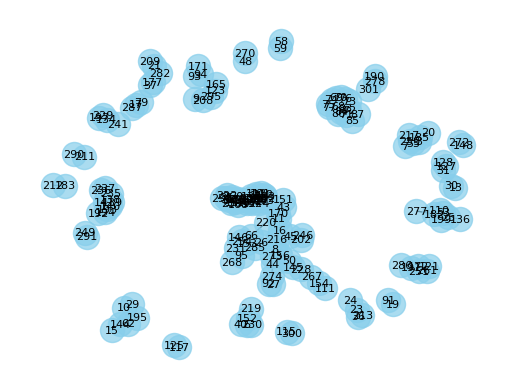

In [ ]:
#Création d'un dictionnaire en attribution un numéro unique pour chaque auteur en comptant le nombre d'occurence en prenant en compte les 10 colonnes (auteur + co auteurs)
author_to_num = {}
current_num = 1

author_occurrences = {}

for _, row in df.iterrows():
    for i in range(10):
        author_col_name = f'marcrel:aut{{URIRef}}[{i}]'
        if author_col_name in df.columns and pd.notnull(row[author_col_name]):
            author = row[author_col_name]
            author_occurrences[author] = author_occurrences.get(author, 0) + 1
#on sélectionne uniquement les auteurs qui ont au moins 100 articles publiés
authors_to_include = {author for author, count in author_occurrences.items() if count >= 100}

#Construction du graphe G
G = nx.Graph()
#parcours du dictionnaire, si un auteur à au moins 100 articles et que son co auteur à également au moins 100 articles alors on ajoute une arete qui montre la collaboration d'un auteur et de ses co auteurs
for _, row in df.iterrows():
    main_author = row['marcrel:aut{URIRef}[0]']
    if pd.notnull(main_author) and main_author in authors_to_include:
        if main_author not in author_to_num:
            author_to_num[main_author] = current_num
            current_num += 1
        main_author_num = author_to_num[main_author]

        for i in range(1, 10):
            co_author_col_name = f'marcrel:aut{{URIRef}}[{i}]'
            if co_author_col_name in df.columns and pd.notnull(row[co_author_col_name]):
                co_author = row[co_author_col_name]
                if co_author in authors_to_include:
                    if co_author not in author_to_num:
                        author_to_num[co_author] = current_num
                        current_num += 1
                    co_author_num = author_to_num[co_author]
                    G.add_edge(main_author_num, co_author_num)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='black', alpha=1.0)
nx.draw_networkx_labels(G, pos, labels={num: num for num in G.nodes()}, font_size=8)
plt.axis('off')
plt.show()


Nouvelles statistiques sur la structure du graphe

In [ ]:
print("Nombre de composants connexes : ", nx.number_connected_components(G))
print("Densité : ", round(nx.density(G), 2))
print("Nombre d'arêtes: ", G.number_of_edges())
print("Nombre de Noeuds : ", G.number_of_nodes())

Nombre de composants connexes :  29
Densité :  0.02
Nombre d'arêtes:  276
Nombre de Noeuds :  168


Distribution des degrés

In [ ]:
G.degree()

DegreeView({23: 3, 24: 1, 34: 10, 35: 7, 58: 1, 59: 1, 68: 12, 69: 1, 70: 1, 71: 7, 72: 2, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 83: 2, 84: 2, 85: 1, 86: 2, 87: 1, 93: 1, 94: 2, 99: 15, 100: 18, 101: 6, 102: 6, 103: 6, 112: 9, 113: 6, 114: 9, 127: 2, 31: 1, 128: 1, 130: 18, 131: 9, 132: 7, 133: 7, 138: 4, 139: 5, 140: 5, 141: 3, 157: 9, 158: 17, 159: 12, 160: 9, 163: 5, 167: 9, 168: 5, 192: 2, 193: 4, 194: 3, 206: 15, 213: 2, 36: 2, 222: 7, 223: 13, 19: 1, 91: 1, 235: 4, 236: 2, 237: 2, 62: 2, 195: 1, 238: 6, 244: 5, 258: 4, 260: 8, 264: 7, 229: 2, 197: 2, 283: 16, 66: 5, 153: 4, 115: 1, 300: 1, 254: 2, 182: 5, 110: 2, 45: 4, 202: 1, 286: 1, 191: 2, 10: 1, 29: 1, 170: 5, 11: 4, 43: 2, 220: 3, 190: 1, 278: 2, 16: 4, 117: 1, 125: 1, 165: 1, 123: 2, 8: 6, 285: 3, 152: 4, 6: 2, 15: 1, 144: 2, 230: 2, 216: 2, 249: 1, 291: 1, 185: 3, 20: 1, 295: 2, 208: 2, 53: 2, 55: 4, 259: 5, 21: 2, 282: 1, 209: 1, 270: 1, 48: 1, 290: 1, 211: 1, 274: 3, 44: 2, 27: 2, 95: 2, 134: 3, 37: 1, 177: 1, 272: 1, 148:

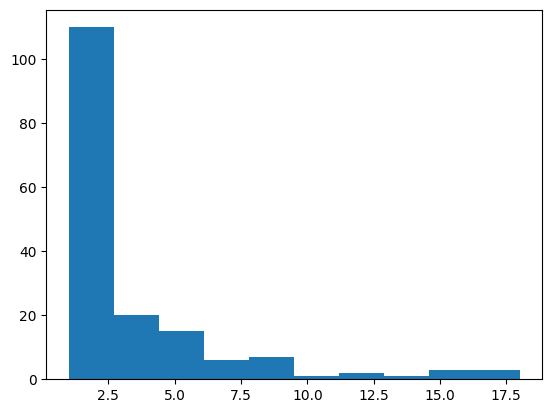

In [ ]:
d_degree = dict(G.degree())
n, bins, patches = plt.hist(d_degree.values())
plt.show()

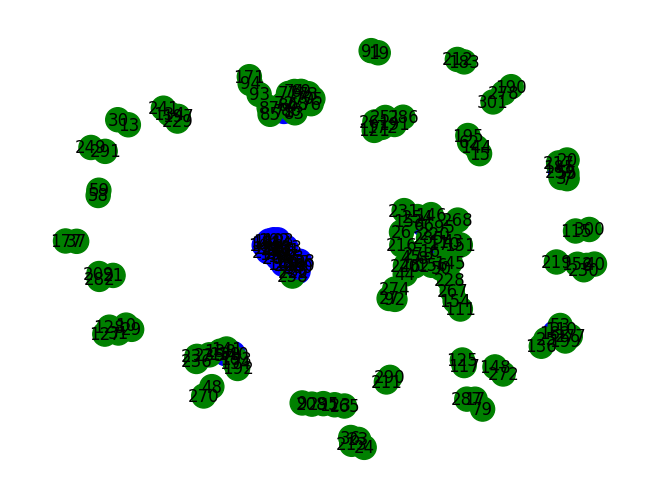

In [ ]:
#Visualisation de G en fonction des degres, si degre inférieur à 5 alors on affiche en vert sinon en bleu
color_map = []
for node in G:
    if d_degree[node]<5:
        color_map.append('green')
    else:
        color_map.append('blue')
nx.draw(G, node_color=color_map, with_labels=True)

Matrice d'adjacence

In [ ]:
G.adj

AdjacencyView({23: {24: {}, 213: {}, 36: {}}, 24: {23: {}}, 34: {35: {}, 157: {}, 222: {}, 223: {}, 159: {}, 258: {}, 160: {}, 260: {}, 158: {}, 238: {}}, 35: {34: {}, 159: {}, 222: {}, 160: {}, 258: {}, 223: {}, 260: {}}, 58: {59: {}}, 59: {58: {}}, 68: {69: {}, 70: {}, 71: {}, 72: {}, 73: {}, 74: {}, 75: {}, 76: {}, 77: {}, 83: {}, 84: {}, 86: {}}, 69: {68: {}}, 70: {68: {}}, 71: {68: {}, 83: {}, 84: {}, 72: {}, 85: {}, 86: {}, 87: {}}, 72: {68: {}, 71: {}}, 73: {68: {}}, 74: {68: {}}, 75: {68: {}}, 76: {68: {}}, 77: {68: {}}, 83: {71: {}, 68: {}}, 84: {71: {}, 68: {}}, 85: {71: {}}, 86: {71: {}, 68: {}}, 87: {71: {}}, 93: {94: {}}, 94: {93: {}, 171: {}}, 99: {100: {}, 101: {}, 102: {}, 103: {}, 112: {}, 114: {}, 163: {}, 130: {}, 131: {}, 132: {}, 133: {}, 113: {}, 244: {}, 206: {}, 283: {}}, 100: {99: {}, 130: {}, 112: {}, 113: {}, 114: {}, 101: {}, 102: {}, 103: {}, 133: {}, 244: {}, 158: {}, 283: {}, 163: {}, 206: {}, 132: {}, 167: {}, 131: {}, 159: {}}, 101: {99: {}, 112: {}, 10

In [ ]:
#On crée A, une matrice sparce pour obtenir une matrice dense
A = nx.to_scipy_sparse_array(G)
A.todense()

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

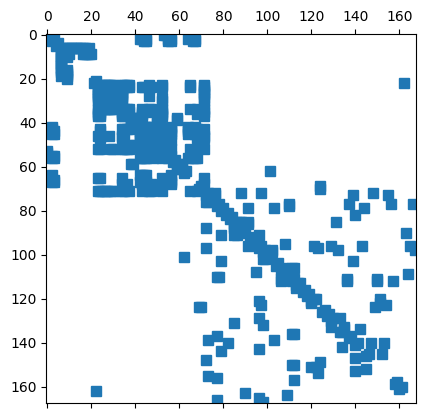

In [ ]:
#Représentation de la matrice d'adjacence
plt.spy(A, markersize=7)

In [ ]:
#chemin de longeur 2 avec A²
A2 = A@A
A2.todense()

array([[ 3,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

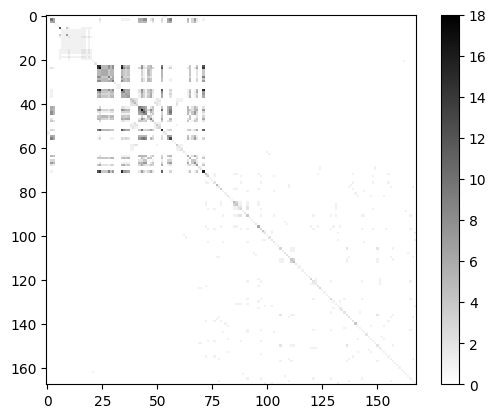

In [ ]:
#distribution des chemin
d = A2.todense()
plt.imshow(d,interpolation='none',cmap='binary')
plt.colorbar()

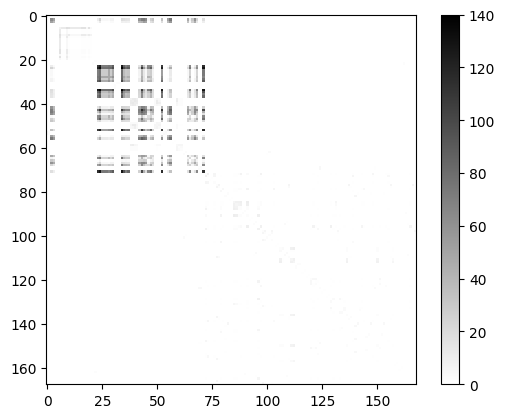

In [ ]:
#nombre de chemin de longeur 3
A3 = A@A2
d3 = A3.todense()
plt.imshow(d3,interpolation='none',cmap='binary')
plt.colorbar()

Mesures de centralités

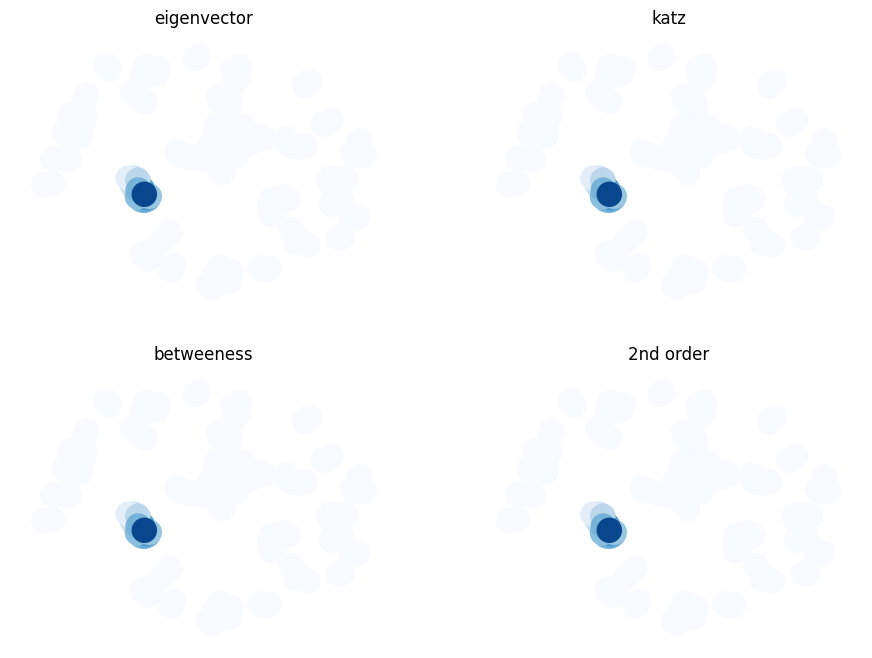

In [ ]:
#Mesure de centralité en utilisant eigenvector, katz, betweeness, 2nd order
centralities = [nx.eigenvector_centrality, nx.katz_centrality, nx.betweenness_centrality, nx.second_order_centrality]
centralities_names = ["eigenvector", "katz", "betweeness", "2nd order"]
val_cent = []

for c in centralities:
    try:
        val_cent.append(nx.eigenvector_centrality(G, max_iter=1000, tol=1e-5))
    except nx.PowerIterationFailedConvergence as e:
        print(f"La convergence a échoué pour {c.__name__}.")

my_pos = nx.spring_layout(G)

figure = plt.figure(figsize=(11, 8))
for i in range(len(centralities)):
    figure.add_subplot(2, 2, i+1)
    plt.title(centralities_names[i])
    nx.draw(G, pos = my_pos, with_labels=False, node_color=[*val_cent[i].values()], cmap=plt.cm.Blues)
plt.show()

# Fonction 3 : Moteur de recherche

L’une des fonctionnalités qui est demandé est de pouvoir entrer un a plusieurs mots-clefs et retourner à l’utilisateur un ensemble d’articles relatifs a cette requête. Pour commencer, la solution implémentée peut être de calculer une simple similarité basée sur les mots, ce qui nécessite d’indexer le corpus a
l’aide d’un outil comme ceux fournis par scikit-learn. Une meilleure solution consiste a calculer une similarité sémantique entre la requête et le texte des documents, en employant des techniques de représentation du sens des phrases, tel que USE ou S-BERT. Pour finir, une solution intéressante et plus exploratoire consiste à prendre en compte non seulement l’information textuelle mais aussi les relations structurelles entre les documents et les auteurs. Il s’agit par ex. d’utiliser des techniques de plongement de graphes (comme les GNNs) pour calculer des représentations qui prennent en compte le voisinage des nœuds.


In [ ]:
# On charge un modèle SBERT pré-entraîné
#Ce modèle basé sur MiniLM est très petit donc permet d'être performant de manière rapide
#model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
#Cet autre modèle présente l'avantage de pouvoir traiter plusieurs langues. Nous savons que nous avons des articles dans des langues autres que le français donc c'est intéressant
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#On transforme nos titres et résumés sous la forme de listes de chaine de caractères pour permettre la transformation en tenseurs
titles = df['dcterms:title{Literal}'].astype(str).tolist()
abstract = df['dcterms:abstract{Literal}@fr'].astype(str).tolist()

# Vérifier à nouveau le type de titles
print(type(titles))
print(type(abstract))

<class 'list'>
<class 'list'>


In [ ]:
# Charger le tenseur document_embeddings à partir du fichier s'il existe
try:
    titre_embeddings = np.load('titre_embeddings.npy')
    abstract_embeddings = np.load('abstract_embeddings.npy')
    document_embeddings = np.load('document_embeddings.npy')
    print("Tenseurs chargés avec succès.")
except FileNotFoundError:
    #Si les fichiers n'ont pas été trouvés
    print("Tenseurs non trouvés. Génération des tenseurs...")

    #On utilise ensuite le modèle choisi pour encoder nos chaines
    titre_embeddings = model.encode(titles, convert_to_tensor=True).cpu().numpy()
    abstract_embeddings = model.encode(abstract, convert_to_tensor=True).cpu().numpy()

    #Permet de modifier le ratio d'importance entre les différents éléments
    #L'idée était de permettre la prise en compte du titre par exemple qui contient en général les mots les plus importants
    poids_titre = 0.5
    poids_abstract = 0.5

    # On calcule l'embedding final pondéré en combinant les deux embeddings
    document_embeddings = (poids_titre * titre_embeddings + poids_abstract * abstract_embeddings) / (poids_titre + poids_abstract)
    # On sauvegarde les tenseurs pour ne pas avoir à les générer à chaque fois
    np.save('titre_embeddings.npy', titre_embeddings)
    np.save('abstract_embeddings.npy', abstract_embeddings)
    np.save('document_embeddings.npy', document_embeddings)
    print('Génération terminée.')

Tenseurs non trouvés. Génération des tenseurs...
Génération terminée.


In [ ]:
#On construit une fonction qui sera activée lorsque le bouton recherche est utilisé
def on_search_text(b):
    #On récupère le texte qui a été entré par l'utilisateur
    query = text.value

    #On transforme la requête à partir du même modèle de langue que précédement
    query_embedding = model.encode([query], convert_to_tensor=True).cpu().numpy()
    #Ici on récupère le chopix de l'utilisateur concernant le type de recherche à effectuer
    #On réalise ensuite le calcul de similarité par rapport à l'embedding qui nous intéresse
    if option.value == 'Titre':
        similarities = cosine_similarity(query_embedding, titre_embeddings)
        print("Voici les résultats de la recherche par titre :")
    elif option.value == 'Résumé':
        similarities = cosine_similarity(query_embedding, abstract_embeddings)
        print("Voici les résultats de la recherche par résumé :")
    else:
      similarities = cosine_similarity(query_embedding, document_embeddings)
      print("Voici les résultats de votre recherche :")

    # On peut choisir de récupérer l'indice du document le plus similaire
    #most_similar_index = similarities.argmax()

    # On récupère les indices des documents les plus similaires en triant nos scores de similarité par ordre décroisant
    top_indices = similarities.argsort()[0][::-1]

    # On filtre les résultats en fonction de la catégorie si elle est spécifiée
    if category_checkbox.value:
        #On convertit en minuscule afin de ne pas avoir de sensibilité à la casse
        category_value = category_text.value.lower()
        #On compare à la liste de discipline que nous avions générer au départ
        if any(category_value in disciplines.lower() for disciplines in df['Disciplines']):
            #Si la discipline demandée a été trouvée alors on ne conservent que les articles correspondants dans la liste de scores
            top_indices = [index for index in top_indices if category_value in df.iloc[index]['Disciplines'].lower()]
        else:
          print('Catégorie non trouvée. La recherche a été réalisé sans filtre')

    # On sélectionne les 10 meilleurs résultats parmi les indices filtrés
    top_10_indices = top_indices[:10]

    cpt = 1
    for index in top_10_indices:
        # On affiche les titres des 10 documents les plus similaires
        most_similar_title = df.iloc[index]['dcterms:title{Literal}']
        print("Le titre du resultat n°",cpt," est :", most_similar_title)
        cpt += 1

#Cette fonction permet d'activer ou non laa barre de recherche de la catégorie selon que la case soit cochée
def toggle_category_text(change):
    category_text.disabled = not change.new

#On construit certains éléments graphiques qui nous servent à afficher notre recherche
text = widgets.Text(description="Recherche:")
button = widgets.Button(description="Rechercher")
button.on_click(on_search_text)

#On crée un radio bouton (un seul choix possible) pour choisir le type de recherche. Par défault il est sur Titre
option = widgets.RadioButtons(
    options=['Titre', 'Résumé', 'Titre et résumé'],
    disabled=False
)

# On ajoute une case à cocher pour la catégorie
category_checkbox = widgets.Checkbox(
    value=False,
    description='Spécifier une catégorie',
    disabled=False
)

# Ajout d'un champ texte pour la catégorie (initiallement invisible)
category_text = widgets.Text(description="Catégorie:", disabled=True)

# On relie la visibilité du champ texte à l'inverse de la valeur de la case à cocher
category_checkbox.observe(toggle_category_text, names='value')

#On affiche alors tout nos éléments de manière à avoir un interface
display(HTML("<h3>Sélectionnez les critères de votre recherche :</h3>"))
display(option)
display(category_checkbox)
display(category_text)
display(HTML("<h3>Entrez votre recherche :</h3>"))
display(text)
display(button)

RadioButtons(options=('Titre', 'Résumé', 'Titre et résumé'), value='Titre')

Checkbox(value=False, description='Spécifier une catégorie')

Text(value='', description='Catégorie:', disabled=True)

Text(value='', description='Recherche:')

Button(description='Rechercher', style=ButtonStyle())

Voici les résultats de votre recherche :
Le titre du resultat n° 1  est : La voiture Ã©lectrique
Le titre du resultat n° 2  est : Vorwort
Le titre du resultat n° 3  est : Vorwort
Le titre du resultat n° 4  est : Vorwort
Le titre du resultat n° 5  est : Vori 
Le titre du resultat n° 6  est : Vooringenomenheid ?
Le titre du resultat n° 7  est : Vorbemerkung
Le titre du resultat n° 8  est : Voeu
Le titre du resultat n° 9  est : Voeu
Le titre du resultat n° 10  est : VoudÃ©ni
Voici les résultats de votre recherche :
pas trouvé
Le titre du resultat n° 1  est : La voiture Ã©lectrique
Le titre du resultat n° 2  est : Vorwort
Le titre du resultat n° 3  est : Vorwort
Le titre du resultat n° 4  est : Vorwort
Le titre du resultat n° 5  est : Vori 
Le titre du resultat n° 6  est : Vooringenomenheid ?
Le titre du resultat n° 7  est : Vorbemerkung
Le titre du resultat n° 8  est : Voeu
Le titre du resultat n° 9  est : Voeu
Le titre du resultat n° 10  est : VoudÃ©ni


Dans la suite nous avons réalisé une version améliorée et plus complexe de notre système de recherche. Nous pouvons désormais choisir la discipline à partir d'une liste déroulante ce qui simplifie la bonne sélection des disciplines et nous pouvons également choisir le nombre de résultats à obtenir en sortie.

In [ ]:
#On réutilise une fonction très proche de la précédente
def on_search_drop(b):
    query = text.value
    query_embedding = model.encode([query], convert_to_tensor=True).cpu().numpy()
    if option.value == 'Titre':
        similarities = cosine_similarity(query_embedding, titre_embeddings)
        print("Voici les résultats de la recherche par titre :")
    elif option.value == 'Résumé':
        similarities = cosine_similarity(query_embedding, abstract_embeddings)
        print("Voici les résultats de la recherche par résumé :")
    else:
      similarities = cosine_similarity(query_embedding, document_embeddings)
      print("Voici les résultats de votre recherche :")

    top_indices = similarities.argsort()[0][::-1]

    #Cette fois ci la valeur que nous récupérons a été entrée à partir de la liste déroulante ce qui veut dire que cette catégorie est censé exister dans nos données.
    #Nous faisons tout de même une vérification complète pour limiter les risques d'erreurs.
    if category_checkbox.value:
        category_value = category_dropdown.value.lower()
        if any(category_value in disciplines.lower() for disciplines in df['Disciplines']):
            top_indices = [index for index in top_indices if category_value in df.iloc[index]['Disciplines'].lower()]
        else:
          print('Catégorie non trouvée. La recherche a été réalisé sans filtre')

    # On récupère uniquement le nombre de scores qui ont été demandés par l'utilisateur. Cela permet de pouvoir décider si l'on souhaite uniquement la meilleure réponse ou au contraire une liste importante.
    num_results = int(result_number.value)
    top_indices = top_indices[:num_results]

    cpt = 1
    for index in top_indices:
        # On affiche les titres des documents les plus similaires
        most_similar_title = df.iloc[index]['dcterms:title{Literal}']
        print("Le titre du resultat n°",cpt," est :", most_similar_title)
        cpt += 1

def toggle_category_drop(change):
    category_dropdown.disabled = not change.new

#On utilise une fonction afin de vérifier que les valeurs qui sont entrées en tant que nombre d'articles à chercher sont valies.
#Nous voulons vérifier à la fois qu'il s'agisse bien de valeurs entières mais aussi nous limitons le nombre à afficher pour conserver des performances correctes.
def validate_input(change):
    try:
        value = int(change.new)
        #On limite le nombre maximum de valeurs à afficher à 30
        if value <= 0 or value > 30:
            raise ValueError("La valeur doit être comprise entre 1 et 30")
    except ValueError:
        #Dans le cas où nous avons une erreur lors de l'éxecution nous repartons sur la valeur par défaut qui correspond à 10 résultats
        if change.new != '' and change.new.isdigit():
            result_number.value = '10'
            print("Veuillez entrer un nombre valide entre 1 et 30.")
        elif change.new != '':
            result_number.value = '10'
            print("Veuillez entrer un nombre valide.")

text = widgets.Text(description="Recherche:")
button = widgets.Button(description="Rechercher")
button.on_click(on_search_drop)

option = widgets.RadioButtons(
    options=['Titre', 'Résumé', 'Titre et résumé'],
    disabled=False
)

category_checkbox = widgets.Checkbox(
    value=False,
    description='Spécifier une catégorie',
    disabled=False
)

# On a transformé notre barre de recherche en une liste déroulante
category_dropdown = widgets.Dropdown(
    options=[''] + sorted(df['Disciplines'].unique()),
    description='Discipline:',
    disabled=True
)

# Champ à remplir pour spécifier le nombre de résultats à afficher. On précise une valeur par défaut à 10
result_number = widgets.Text(
    value='10',
    description='Nombre de résultats:',
    disabled=False
)

# Lier la visibilité du champ texte à la valeur de la case à cocher
category_checkbox.observe(toggle_category_drop, names='value')
#On observe le nombre de résultats pour faire la vérification de la validité des valeurs
result_number.observe(validate_input, names='value')

display(HTML("<h3>Sélectionnez les critères de votre recherche :</h3>"))
display(option)
display(category_checkbox)
display(category_dropdown)
display(result_number)
display(HTML("<h3>Entrez votre recherche :</h3>"))
display(text)
display(button)

RadioButtons(options=('Titre', 'Résumé', 'Titre et résumé'), value='Titre')

Checkbox(value=False, description='Spécifier une catégorie')

Dropdown(description='Discipline:', disabled=True, options=('', 'Anthropologie', 'Archeologie (M.Anc.)', 'Arts…

Text(value='10', description='Nombre de résultats:')

Text(value='', description='Recherche:')

Button(description='Rechercher', style=ButtonStyle())

Voici les résultats de la recherche par titre :
Le titre du resultat n° 1  est : Charles de Gaulle et AndrÃ© Malraux mÃ©morialistes : espoirs, songes et rÃ©alitÃ©s
Le titre du resultat n° 2  est : Gaston Paris
Le titre du resultat n° 3  est : SÃ©nÃ¨que Ã  Paris
Le titre du resultat n° 4  est : Anatole France et Paris
Le titre du resultat n° 5  est : ComitÃ© France-GrÃ¨ce
Le titre du resultat n° 6  est : ComitÃ© France-GrÃ¨ce
Le titre du resultat n° 7  est : ComitÃ© France-GrÃ¨ce
Le titre du resultat n° 8  est : Yves de Paris et les Provinciales
Le titre du resultat n° 9  est : Jean-FranÃ§ois Louette, Sans protocole, Paris, Belin (Lâ€™ExtrÃªme contemporain), 2005
Le titre du resultat n° 10  est : Jacob Burckhardt Ã  Paris
Veuillez entrer un nombre valide.
Voici les résultats de la recherche par titre :
Le titre du resultat n° 1  est : Charles de Gaulle et AndrÃ© Malraux mÃ©morialistes : espoirs, songes et rÃ©alitÃ©s
Le titre du resultat n° 2  est : Gaston Paris
Le titre du resultat n° 3

# Fonction 4 : Ajout de clustering

Vous pouvez tester un (ou plusieurs) algorithmes de clustering classiques, comme le clustering spectral ou Louvain. Il existe bien sûr d’autres solutions, tel que les block models. Ajoutez ces catégories calculées automatiquement dans vos données. Vous pouvez ainsi faire en sorte de les projeter sur la visualisation. Il peut être intéressant d’analyser la différence entre la classification qui vous est donnée et celle-ci, soit de manière purement qualitative, soit en employant des mesures comme l’ARI ou l’AMI

Clustering de Louvain

In [ ]:
#clustering de louvain, affichage des communautés
nx.community.louvain_communities(G)

[{58, 59},
 {68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 83, 84, 85, 86, 87},
 {93, 94, 171},
 {99,
  100,
  101,
  102,
  103,
  112,
  113,
  114,
  130,
  131,
  132,
  133,
  163,
  167,
  206,
  244,
  264,
  283},
 {31, 127, 128},
 {34, 35, 157, 158, 159, 160, 168, 222, 223, 238, 258, 260},
 {138, 139, 140, 141, 192, 193, 194, 235, 236, 237},
 {23, 24, 36, 213},
 {19, 91},
 {134, 197, 229, 241},
 {115, 300},
 {10, 29},
 {190, 278, 301},
 {117, 125},
 {6, 40, 152, 219, 230},
 {15, 62, 144, 195},
 {249, 291},
 {25, 53, 110, 136, 182, 199, 277},
 {21, 209, 282},
 {48, 270},
 {211, 290},
 {11, 16, 26, 43, 45, 66, 146, 151, 153, 170, 202, 216, 220, 231, 246, 254},
 {37, 177},
 {148, 272},
 {8, 27, 44, 50, 92, 95, 111, 145, 154, 156, 228, 267, 268, 273, 274, 285},
 {3, 7, 20, 55, 185, 217, 259},
 {121, 172, 191, 251, 261, 286},
 {17, 79, 287},
 {13, 30},
 {183, 212},
 {9, 123, 165, 208, 295}]

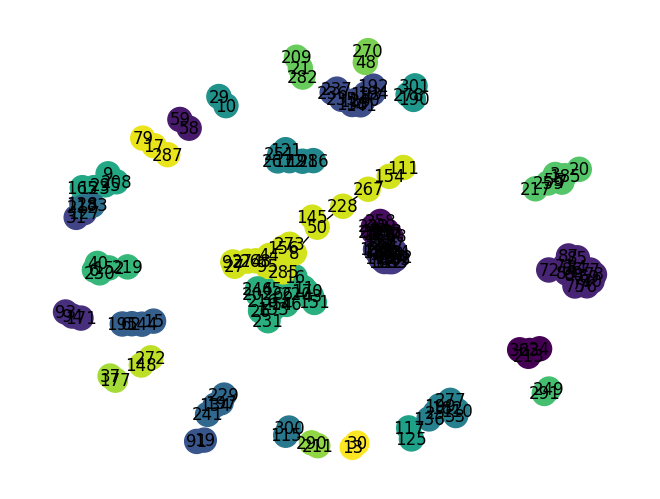

In [ ]:
partition = community_louvain.best_partition(G)
#création des communautés du graphe G en prenant la meilleure partition
#on stocke les identifiants des auteurs dans des communautés
for node, id_community in partition.items():
    G.nodes[node]['community'] = id_community

couleurs = [node[1]['community'] for node in G.nodes(data=True)]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=couleurs, with_labels=True)
plt.show()

Clustering spectral

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


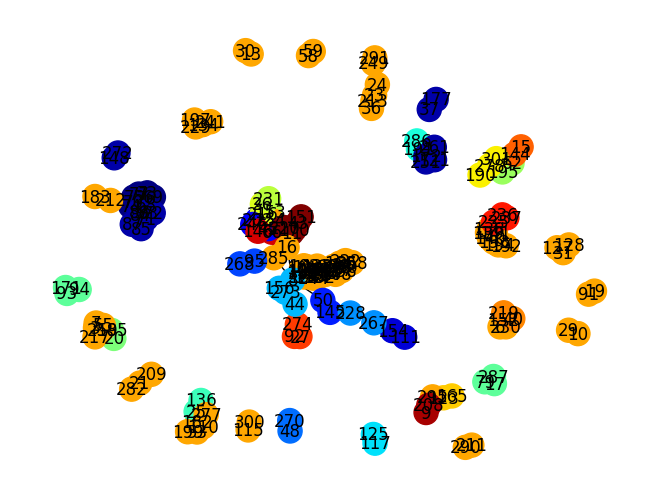

In [ ]:
#on convertit le graphe G en matrice d'adjacence
adjacency_matrix = nx.to_numpy_array(G)
#on définit le nombre de clusters
#27 → 26 diciplines trouvés + 1 introuvable
n_clusters = 27
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', n_init=100)
sc.fit(adjacency_matrix)

for i, node in enumerate(G.nodes()):
    G.nodes[node]['community'] = sc.labels_[i]

couleurs = [node[1]['community'] for node in G.nodes(data=True)]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=couleurs, with_labels=True, cmap=plt.cm.jet)
plt.show()

In [ ]:
#affichage des différents clusters avec l'identifiants des auteurs
clusters = collections.defaultdict(list)
for node, data in G.nodes(data=True):
    cluster_id = data['community']
    clusters[cluster_id].append(node)

for cluster_id, nodes in clusters.items():
    print(f"Cluster {cluster_id}: {nodes}")


Cluster 3: [23, 24, 34, 35, 58, 59, 93, 94, 99, 100, 101, 102, 103, 112, 113, 114, 130, 131, 132, 133, 138, 139, 140, 141, 157, 158, 159, 160, 163, 167, 168, 192, 193, 194, 206, 213, 36, 222, 223, 238, 244, 258, 260, 264, 229, 197, 283, 115, 300, 182, 110, 170, 11, 43, 220, 16, 117, 125, 285, 152, 249, 291, 295, 53, 134, 272, 148, 151, 241, 199, 171, 277]
Cluster 22: [68, 69, 70, 73, 74, 75, 76, 77]
Cluster 0: [71, 72, 83, 84, 85, 86, 87, 127, 31, 128, 10, 29, 190, 278, 270, 48, 290, 211, 17, 287, 79, 30, 13, 183, 212, 301]
Cluster 26: [19, 91, 55, 259, 7, 3, 217]
Cluster 24: [235, 236, 237]
Cluster 15: [62, 195]
Cluster 25: [66, 146]
Cluster 10: [153, 254, 231]
Cluster 12: [45, 202, 246]
Cluster 1: [286, 191]
Cluster 17: [165, 123]
Cluster 8: [8, 44, 273, 156]
Cluster 19: [6, 230]
Cluster 16: [15, 144]
Cluster 7: [216, 26]
Cluster 11: [185, 20]
Cluster 14: [208, 9]
Cluster 9: [21, 282, 209]
Cluster 21: [274, 27, 92]
Cluster 13: [95, 268]
Cluster 23: [37, 177]
Cluster 2: [50, 145]
Clus

On voit qu'il y a des auteurs qui sont dans les mêmes clusters dans les 2 méthodes, avec Louvain on a 31 clusters définit et avec le clustering spectral on définit 27, si on définit 31 également, les clusters sont assez similaires.

# Fonction 5 : Classification supervisée

Vous devez résoudre un problème de classification des nœuds du graphe dans certaines catégories prévues à l’avance. Il s’agit par exemple de prédire la catégorie de la publication en fonction de son domaine (par ex. machine learning ou traitement d’image). Pour cela, vous pouvez utiliser les caractéristiques textuelles uniquement (par ex. issues d’une vectorisation sémantique), les caractéristiques structurelles (par ex. un vecteur de caractéristiques du nœud ou un vecteur issue de Node2Vec), ou les deux à la fois. Des expérimentations intéressantes consistent à comparer ces différents modes de représentation et d’observer si les erreurs sont les mêmes ou non, voire de trouver selon quelles conditions l’une est préférable à l’autre.

In [22]:
df_sample = df.sample(frac=0.1, random_state=42)

In [30]:
# Instanciation de LabelEncoder
label_encoder = LabelEncoder()

# On commence par coder les étiquettes (labels)
y_encoded = label_encoder.fit_transform(df_sample['Disciplines'])

# On convertit les valeurs des colonnes en chaînes de caractères
df_sample['dcterms:title{Literal}'] = df_sample['dcterms:title{Literal}'].astype(str)
df_sample['dcterms:abstract{Literal}@fr'] = df_sample['dcterms:abstract{Literal}@fr'].astype(str)
#On rassemble ensuite les valeurs de notre titre et de notre résumé comme une chaine de caractère unique
df_sample['Texte_complet'] = df_sample['dcterms:title{Literal}'] + ' ' + df_sample['dcterms:abstract{Literal}@fr']

# On sépare les labels Y que l'on cherche à prédire des features X qui seront utilisées
X = df_sample['Texte_complet']
y = y_encoded

# On vectorisd des textes
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# On divise les données en ensembles d'entraînement et de test
#Ici on prend 70% de nos données pour l'entrainement et cela est suffisant car nous avons beaucoup de données.
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, train_size = 0.7, test_size=0.3, random_state=6)

# Initialisation du modèle SVM
svm_model = SVC(kernel='linear')

# On fit ensuite notre modèle
svm_model.fit(X_train, y_train)

# On utilise notre ensemble de test pour prédire nos données
y_pred = svm_model.predict(X_test)

#On évalue le modèle en comparant les résultats entre nos prédictions supposée et ce que nous obtenons avec notre modèle
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.07      0.13       108
           1       0.69      0.33      0.45       252
           2       1.00      0.06      0.11        50
           3       0.50      0.13      0.21       141
           4       0.68      0.40      0.50       227
           5       0.57      0.17      0.27       139
           6       0.54      0.51      0.52       711
           7       0.46      0.21      0.28       535
           8       0.00      0.00      0.00        11
           9       0.39      0.13      0.19       219
          10       1.00      0.05      0.09       253
          11       0.31      0.71      0.43      1719
          12       0.00      0.00      0.00        22
          13       0.49      0.17      0.26       482
          14       0.39      0.32      0.35       661
          15       0.00      0.00      0.00         7
          16       0.45      0.13      0.21       226
          17       0.71    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On remarque que la précision est assez mauvaise mais étant donné que le texte et le résumé peuvent être assez limités en terme d'informations ce résultat reste acceptable.

In [29]:
#On conserve les y précédents pour ce nouveau modèle et cette fois ci on va chercher à mieux représenter la sémantique à partir d'une vectorisation via Word2Vec
X_text = df_sample['dcterms:title{Literal}'] + ' ' + df_sample['dcterms:abstract{Literal}@fr']

X_tokenized = [text.split() for text in X_text]

# On entraine un modèle Word2Vec sur les données
word2vec_model = Word2Vec(sentences=X_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Fonction pour obtenir le vecteur moyen d'un texte
def get_average_word_vector(text, model, vector_size):
    words = text.split()
    #On construit notre vecteur à partir de chaque mot de nos textes que l'on moyenne ensuite dans un vecteur unique
    vectors = [model.wv[word] for word in words if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

X_vectors = np.array([get_average_word_vector(text, word2vec_model, word2vec_model.vector_size) for text in X_text])

# On code les labels sous forme numérique
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# On divise à nouvea les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y_encoded, test_size=0.2, random_state=42)

# On initialise un modèle linéaire
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

#On prédit ensuite nos résultats et on affiche les performances de notre modèle.
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00       190
           2       0.00      0.00      0.00        33
           3       0.50      0.02      0.04       100
           4       0.00      0.00      0.00       178
           5       0.00      0.00      0.00        92
           6       0.55      0.31      0.40       450
           7       0.00      0.00      0.00       367
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00       166
          11       0.19      0.86      0.31      1158
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00       313
          14       0.00      0.00      0.00       461
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00       172
          17       0.80    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
